In [79]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [80]:
source='data/BA_reviews.csv'
data=pd.read_csv(source)

In [81]:
data=data.drop("Unnamed: 0",axis=1)

In [82]:
data

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...
...,...
1495,✅ Verified Review | London Heathrow to Edinbu...
1496,✅ Verified Review | London to Valencia in an ...
1497,✅ Verified Review | Brussels to Rome via Lond...
1498,"✅ Verified Review | Awful, cost cutting beyon..."


In [83]:
data["Trip-Status"] = data["reviews"].str.split("|", expand=True)[0]
data["Reviews"]=data["reviews"].str.split("|", expand=True)[1]
data=data.drop('reviews',axis=1)
data=data.drop('Trip-Status',axis=1)

In [84]:
data

,Reviews
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
3,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...
...,...
1495,"London Heathrow to Edinburgh return, possibl..."
1496,London to Valencia in an A319 in Club Europe...
1497,Brussels to Rome via London. There are no su...
1498,"Awful, cost cutting beyond belief. Dirty air..."


In [85]:
data.isnull().sum()
data.dropna

<bound method DataFrame.dropna of                                                 Reviews
0       My family and I have flown mostly on British...
1       This has been by far the worst service I hav...
2       In Nov 2022 I booked and paid for a return j...
3      BA is not treating its premium economy passen...
4       24 hours before our departure on BA059 to Ca...
...                                                 ...
1495    London Heathrow to Edinburgh return, possibl...
1496    London to Valencia in an A319 in Club Europe...
1497    Brussels to Rome via London. There are no su...
1498    Awful, cost cutting beyond belief. Dirty air...
1499    London Heathrow to Madrid. An absolute third...

[1500 rows x 1 columns]>

In [86]:
data.duplicated().sum()

0

In [87]:
data

,Reviews
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
3,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...
...,...
1495,"London Heathrow to Edinburgh return, possibl..."
1496,London to Valencia in an A319 in Club Europe...
1497,Brussels to Rome via London. There are no su...
1498,"Awful, cost cutting beyond belief. Dirty air..."


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1499 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


Review 1: Sentiment Score 0.919
Review 2: Sentiment Score -0.4486
Review 3: Sentiment Score -0.9281
Review 4: Sentiment Score 0.4404
Review 5: Sentiment Score -0.2558
Review 6: Sentiment Score -0.9124
Review 7: Sentiment Score 0.0258
Review 8: Sentiment Score -0.4903
Review 9: Sentiment Score 0.765
Review 10: Sentiment Score 0.2584
Review 11: Sentiment Score -0.9704
Review 12: Sentiment Score -0.876
Review 13: Sentiment Score -0.7304
Review 14: Sentiment Score -0.705
Review 15: Sentiment Score -0.799
Review 16: Sentiment Score 0.7184
Review 17: Sentiment Score -0.7096
Review 18: Sentiment Score -0.5849
Review 19: Sentiment Score 0.9657
Review 20: Sentiment Score -0.8932
Review 21: Sentiment Score 0.0516
Review 22: Sentiment Score 0.9032
Review 23: Sentiment Score 0.882
Review 24: Sentiment Score -0.5519
Review 25: Sentiment Score -0.7644
Review 26: Sentiment Score 0.7096
Review 27: Sentiment Score 0.1189
Review 28: Sentiment Score -0.9617
Review 29: Sentiment Score -0.9493
Review 30: S

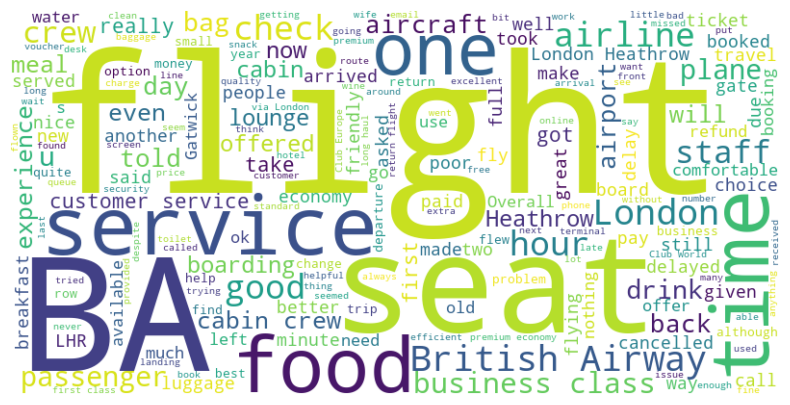

In [93]:
# Extract the 'Reviews' column
reviews = data['Reviews'].astype(str).tolist()

# Preprocess your text data if required

# Tokenize the reviews
tokenized_reviews = [nltk.word_tokenize(review) for review in reviews]

# Perform topic modeling with LDA
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform([' '.join(tokens) for tokens in tokenized_reviews])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Print the topics and their top words
feature_names = vectorizer.get_feature_names() if hasattr(vectorizer, 'get_feature_names') else list(vectorizer.vocabulary_.keys())


# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(review)['compound'] for review in reviews]

# Print the sentiment scores
for i, sentiment in enumerate(sentiments):
    print(f"Review {i + 1}: Sentiment Score {sentiment}")

# Generate a word cloud
all_text = ' '.join(reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


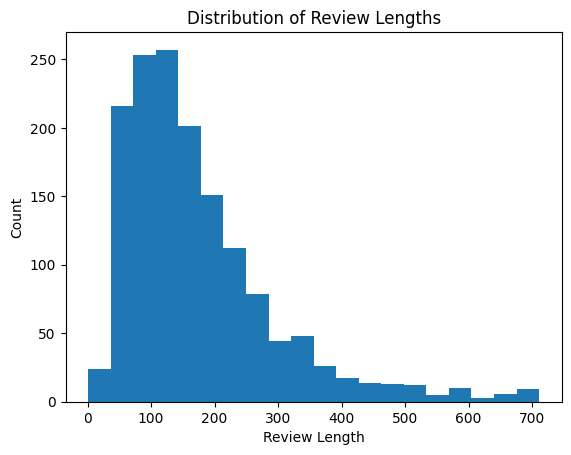

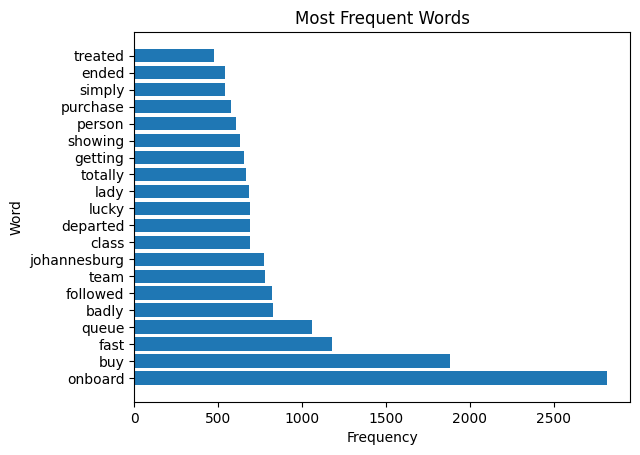

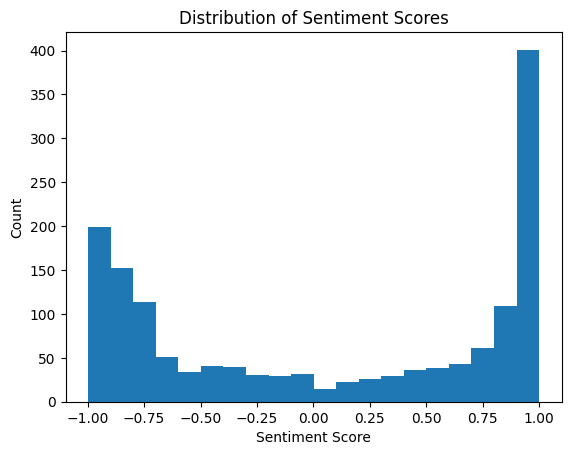

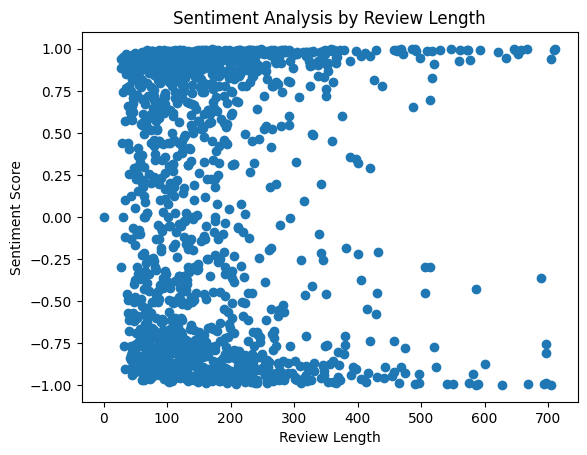

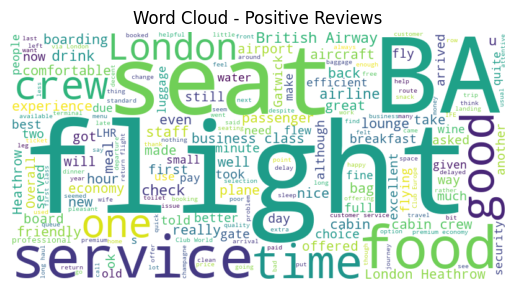

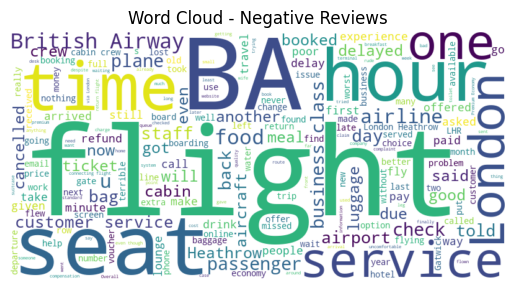

In [96]:
# Review Length Analysis
review_lengths = [len(tokens) for tokens in tokenized_reviews]
plt.hist(review_lengths, bins=20)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths')
plt.show()

# Most Frequent Words Analysis
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform([' '.join(tokens) for tokens in tokenized_reviews])
word_freq = pd.DataFrame(X.toarray(), columns=list(vectorizer.vocabulary_.keys()))
most_common_words = word_freq.sum().sort_values(ascending=False)[:20]
plt.barh(most_common_words.index, most_common_words.values)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most Frequent Words')
plt.show()

# Sentiment Distribution
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(review)['compound'] for review in reviews]
plt.hist(sentiments, bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.show()

# Sentiment Analysis by Review Length
plt.scatter(review_lengths, sentiments)
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis by Review Length')
plt.show()

# Word Frequency by Sentiment
positive_reviews = [review for review, sentiment in zip(reviews, sentiments) if sentiment > 0]
negative_reviews = [review for review, sentiment in zip(reviews, sentiments) if sentiment < 0]

# Word Cloud for Positive Reviews
positive_text = ' '.join(positive_reviews)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

# Word Cloud for Negative Reviews
negative_text = ' '.join(negative_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()